# BUSINESS INTELLIGENCE / BUSINESS ANALYST, LEAD 
## BUSINESS CASE 

# [4]

Download the attached .csv file. Preferably upload it to a SQL db and query your way through the challenge.

YOUR TASK IS TO exploit the information contained in the aforementioned file as you 
find fit. Some things to take into consideration: 

#### [1] This database contains credit card information and transactions from multiple customers. Use your favorite data visualization tool / programming language to explore the data and present the results [R, Python, PowerBI, Spotfire, etc…]. The database has the following architecture: 

Where: 
* ID = This is the user’s unique identifier. 
* UPDATE = Date when the event happened. |
* STATUS = The event, which can take the following values: 
    * EMPTY - The user did not respond to the communication OR there was a transaction (this is reflected in the TXN column). 
    * RESPONSE – The customer responded to the MKT campaign. 
    * RISK – The customer was checked on the risk model whether the customer is fit to get a credit or not. 
    * REJECTED – The risk model determined the customer is not fit to get a credit. 
    * APPROVED – The risk model determined the customer as fit to get a credit. The customer is granted a credit. Here some of the other columns are populated. 
    * DELIVERED – The customer received a physical credit card. 
* MOTIVE = The reason of rejection OR the type of card. 
* INTEREST_RATE = The interest rate of the customer’s credit card. 
* AMOUNT = The amount of the credit granted to the customer. 
* CAT = The annual cost of the credit granted to the customer. 
* TXN = The amount of each transaction for each customer. 
* CP = Zip Code where the physical credit card was delivered to. 
* DELIVERY_SCORE = A score the customer gives to the delivery company for the delivery service. 

Usually, the sign-up process starts when the customer responded to the 
communication, and ends-up with an approval, either with physical or digital card.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv', index_col=0, dtype={'CP':str})
df.columns = df.columns.str.lower()
df['update'] = pd.to_datetime(df['update'], format='%M:%S.%f').dt.time

In [2]:
df

,id,update,status,motive,interest_rate,amount,cat,txn,cp,delivery_score
0,1,00:59:50.400000,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,00:46:41.400000,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:14:50.500000,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,00:08:23.400000,NaN,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12751,4999,00:07:42.200000,NaN,NaN,NaN,NaN,NaN,31.104808,NaN,NaN
12752,4999,00:40:29.500000,NaN,NaN,NaN,NaN,NaN,74.732791,NaN,NaN
12753,4999,00:22:31.700000,NaN,NaN,NaN,NaN,NaN,35774.172720,NaN,NaN
12754,4999,00:27:19.800000,NaN,NaN,NaN,NaN,NaN,79.866598,NaN,NaN


In [3]:
df.dtypes

id                  int64
update             object
status             object
motive             object
interest_rate     float64
amount            float64
cat               float64
txn               float64
cp                 object
delivery_score    float64
dtype: object

In [4]:
df.describe()

,id,interest_rate,amount,cat,txn,delivery_score
count,12756.000000,1505.000000,1505.000000,1505.000000,3773.000000,1046.000000
mean,2516.923330,39.695681,14479.800664,39.663787,2009.774234,1.964627
std,1465.606943,5.924762,14520.262941,5.751843,10034.936766,1.116938
min,1.000000,30.000000,0.000000,30.000000,0.342075,0.000000
25%,1204.000000,35.000000,3800.000000,35.000000,67.888982,1.000000
50%,2571.000000,40.000000,9800.000000,40.000000,265.086727,2.000000
75%,3801.000000,45.000000,20100.000000,45.000000,1061.080947,3.000000
max,4999.000000,49.000000,108300.000000,49.000000,412498.523200,5.000000


In [5]:
df['amount'].quantile([0.10,0.20,0.25,0.50,0.75,0.80,0.90]).reset_index().rename(columns={'index':'quantile'})

,quantile,amount
0,0.10,1540.0
1,0.20,2980.0
2,0.25,3800.0
3,0.50,9800.0
4,0.75,20100.0
5,0.80,23840.0
6,0.90,34360.0


# STATUS

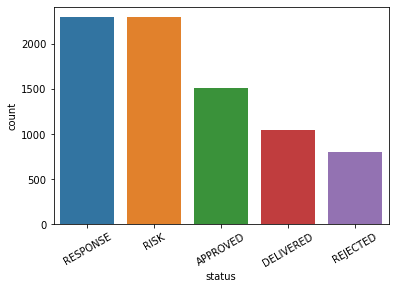

In [6]:
g = sns.countplot(x="status", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation = 30)

None

# MOTIVE (reason of rejection OR the type of card)

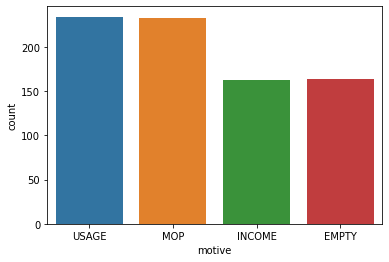

In [7]:
sns.countplot(x="motive", data=df[df.motive.isin(['USAGE','MOP','INCOME','EMPTY'])])
None

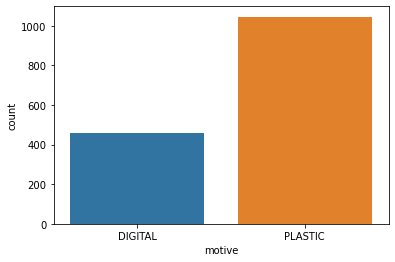

In [8]:
sns.countplot(x="motive", data=df[df.motive.isin(['DIGITAL','PLASTIC'])])
None

# INTEREST RATE

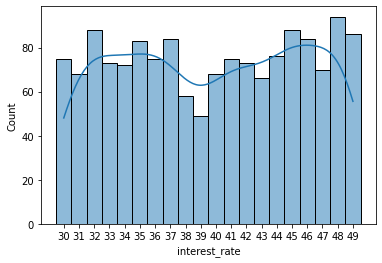

In [9]:
g = sns.histplot(data=df, x="interest_rate", discrete=True, kde=True)

g.set_xticks(range(30,50))
g.set_xticklabels(range(30,50))

None
# For practical purposes the interest rate can be considered to have an uniform distribution (maybe bimodal)

fig = g.get_figure()
fig.savefig('images/irate.png') 

# AMOUNT

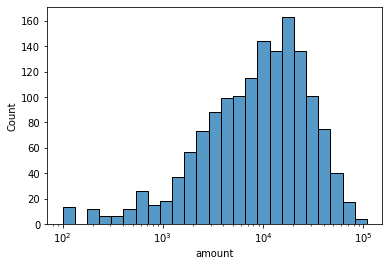

In [10]:
g = sns.histplot(data=df[df['amount'] > 0], x="amount", log_scale=True)
None
# the most popular 'amounts' are between $10,000 and $12,000

fig = g.get_figure()
fig.savefig('images/amount_hist.png')

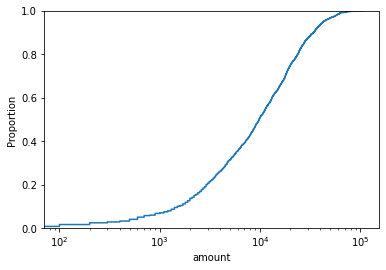

In [11]:
g = sns.ecdfplot(data=df, x="amount")

g.set_xscale('log')
None
# 80% of hour clients have a credit of $20,000 or lower

fig = g.get_figure()
fig.savefig('images/amount_ecdf.png') 

# CAT

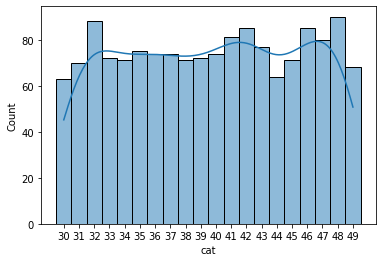

In [12]:
g = sns.histplot(data=df, x="cat", discrete=True, kde=True)

g.set_xticks(range(30,50))
g.set_xticklabels(range(30,50))
None

fig = g.get_figure()
fig.savefig('images/cat.png') 

# TXN

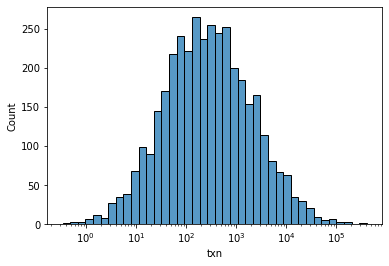

In [13]:
sns.histplot(data=df, x="txn", log_scale=True)
None
# 'txn' has a log-normal distribution with the vast majority of txns being between $100 and $1,000.

# CP

In [14]:
df.cp.value_counts() # we only observe 5 zip-codes

# zip_code, count, location, state
# 53100, 321, Naucalpan, EdoMex
# 44100, 298, Guadalajara Centro, Jalisco
# 11560, 215, Polanco III sección, CDMX
# 64000, 109, Centro, Monterrey
# 44620, 103, Colomos Providencia Guadalajara, Jalisco

53100    321
44100    298
11560    215
64000    109
44620    103
Name: cp, dtype: int64

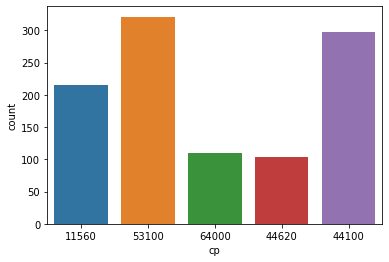

In [15]:
sns.countplot(x="cp", data=df)
None

# DELIVERY_SCORE

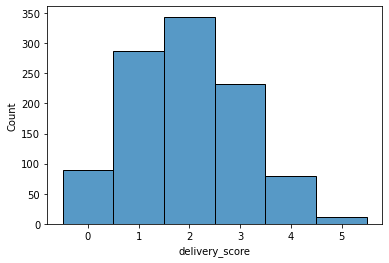

In [16]:
sns.histplot(data=df, x="delivery_score", discrete=True)
None